#Import

In [1]:
import sys
import os

py_file_location = "..."
sys.path.append(os.path.abspath(py_file_location))


In [2]:
from library import *
from model_DL import *
from functions import *
from metrics import *
from data_generator import *
from losses import *
from optimization import *
from parameters import *


/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/frame

In [3]:
def gain_generator(d):
  """
      Channel gain model based on Rayleigh fading from reference [1].
      [1] : Ding, Zhiguo, et al. "On the performance of non-orthogonal multiple access in 5G systems with randomly deployed users." IEEE signal processing letters 21.12 (2014): 1501-1505.
      Args:
         d: Distance between each point.
      Returns:
        Channel gain between each users and relay.
  """    
  s = np.random.normal(mu, sigma, Nbr)
  h = s/np.sqrt(1+(d)**pathloss_factor) 
  h = h**2 # h/N_var division by the same noise variance N_var
  return h

#Noise_var = 10
def noisy_gain_generator(d, N_var):
  s = np.random.normal(mu, sigma, Nbr)
  h = s/np.sqrt(1+(d)**pathloss_factor) 
  
  h = h**2 # h/N_var division by the same noise variance N_var
  h = np.sqrt(h) + np.random.normal(mu, N_var, Nbr)  
  h = h**2  
  return h

def add_noise(x, N_var):
    x = np.sqrt(x) + np.random.normal(mu, N_var, GRP.shape[0]) 
    x = x**2
    return x

#Decode and forward

###Channel gain creation

In [79]:
Noise_variance = 0.1

ans=True
while ans:
    print("""
    1.Our model channel gain
    2.Uniform channel gain
    3.Anne channel gain
    4.AWGN
    5. Rician fading
    6. Nakagami fading
    7. Our model channel gain (Noise added)
    8.Exit/Quit
    """)
    ans=input("Select channel gain\n")
    if ans=="1":
      print("\n Channel gain created")
      # Acces Added
      GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = gain_generator(Dpp_E), gain_generator(Dpr_E), gain_generator(Drp_E), gain_generator(Dss_E), gain_generator(Dsr_E), gain_generator(Drs_E), gain_generator(Dsp_E), gain_generator(Dps_E) # Acces Added
      ans = None
    elif ans=="2":
      print("\n Channel gain created")
      # Acces Added
      GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS  = uniform_gain()
      ans = None
    elif ans =='3':
      GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = gain_generator_2(Dpp_E), gain_generator_2(Dpr_E), gain_generator_2(Drp_E), gain_generator_2(Dss_E), gain_generator_2(Dsr_E), gain_generator_2(Drs_E), gain_generator_2(Dsp_E), gain_generator_2(Dps_E) 
      ans = None
    elif ans =='4':
        GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = gain_generator_3(Dpp_E), gain_generator_3(Dpr_E), gain_generator_3(Drp_E), gain_generator_3(Dss_E), gain_generator_3(Dsr_E), gain_generator_3(Drs_E), gain_generator_3(Dsp_E), gain_generator_3(Dps_E) 
        ans = None
    elif ans =='5':
        GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = rician_fading(), rician_fading(), rician_fading(), rician_fading(), rician_fading(), rician_fading(), rician_fading(), rician_fading() 
        ans = None
    elif ans =='6':
        GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = nakagami_fading(), nakagami_fading(), nakagami_fading(), nakagami_fading(), nakagami_fading(), nakagami_fading(), nakagami_fading(), nakagami_fading()
        ans = None
    elif ans =='7':
      GPP, GPR, GRP, GSS, GSR, GRS, GSP, GPS = noisy_gain_generator(Dpp_E, Noise_variance), noisy_gain_generator(Dpr_E, Noise_variance), noisy_gain_generator(Drp_E, Noise_variance), noisy_gain_generator(Dss_E, Noise_variance), noisy_gain_generator(Dsr_E, Noise_variance), noisy_gain_generator(Drs_E, Noise_variance), noisy_gain_generator(Dsp_E, Noise_variance), noisy_gain_generator(Dps_E, Noise_variance) 
      ans = None
    elif ans =='8':
      ans = None
    else:
       print("\n Not Valid Choice Try again")


    1.Our model channel gain
    2.Uniform channel gain
    3.Anne channel gain
    4.AWGN
    5. Rician fading
    6. Nakagami fading
    7. Our model channel gain (Noise added)
    8.Exit/Quit
    
Select channel gain
1

 Channel gain created


In [5]:
GRP, GPP, GSR, GPR, GSS, GRS, GSP, GPS = data_filter(GRP, GPP, GSR, GPR, GSS, GRS, GSP, GPS)

In [6]:
variance = 0

b_GRP, b_GPP, b_GSR, b_GPR, b_GSS, b_GRS, b_GSP, b_GPS = add_noise(GRP,variance), add_noise(GPP,variance), add_noise(GSR,variance), add_noise(GPR,variance), add_noise(GSS,variance), add_noise(GRS,variance), add_noise(GSP,variance), add_noise(GPS,variance)
                                                                                                                          

NameError: name 'GRP' is not defined

In [7]:
Nbr_test = 20000
Nbr_train = 100000


###Dataset creation

In [92]:
#results = mult_res(BF_A, GRP[:Nbr_test], GPP[:Nbr_test], GSR[:Nbr_test], GPR[:Nbr_test], GSS[:Nbr_test], GRS[:Nbr_test], GSP[:Nbr_test], GPS[:Nbr_test])

#outfile = 'Data/dataset/Model Generalization/Val/dataset_val'

#DS = dataset(GRP[:Nbr_test], GPP[:Nbr_test], GSR[:Nbr_test], GPR[:Nbr_test], GSS[:Nbr_test], GRS[:Nbr_test], GSP[:Nbr_test], GPS[:Nbr_test], results[:,8], results[:,9], results[:,10], results[:,11])

#np.savez(outfile, DS)
#print("\n dataset generation finished")


#--------------------------------#
results_2 = mult_res(BF_A, b_GRP[:Nbr_test], b_GPP[:Nbr_test], b_GSR[:Nbr_test], b_GPR[:Nbr_test], b_GSS[:Nbr_test], b_GRS[:Nbr_test], b_GSP[:Nbr_test], b_GPS[:Nbr_test])

outfile_2 = 'Data/dataset/Model Generalization/Val/dataset_b_val_0'
#DS = dataset_A(GRP, GPP, GSR, GPR, GSS, GRS, GSP, results[:,7], results[:,8], results[:,9], results[:,10])

DS_2 = dataset(b_GRP[:Nbr_test], b_GPP[:Nbr_test], b_GSR[:Nbr_test], b_GPR[:Nbr_test], b_GSS[:Nbr_test], b_GRS[:Nbr_test], b_GSP[:Nbr_test], b_GPS[:Nbr_test], results_2[:,8], results_2[:,9], results_2[:,10], results_2[:,11])

np.savez(outfile_2, DS_2)
print("\n dataset generation finished")




 dataset generation finished


In [38]:
# recently added

outfile = 'Data/dataset/Model Generalization/Train/dataset_train'

DS = dataset_train(GRP[:Nbr_train], GPP[:Nbr_train], GSR[:Nbr_train], GPR[:Nbr_train], GSS[:Nbr_train], GRS[:Nbr_train], GSP[:Nbr_train], GPS[:Nbr_train])

np.savez(outfile, DS)
print("\n dataset generation finished")




 dataset generation finished


In [48]:
# train with noise

outfile = 'Data/dataset/Model Generalization/Train/dataset_b_train_10'

DS = dataset_train(b_GRP[:Nbr_train], b_GPP[:Nbr_train], b_GSR[:Nbr_train], b_GPR[:Nbr_train], b_GSS[:Nbr_train], b_GRS[:Nbr_train], b_GSP[:Nbr_train], b_GPS[:Nbr_train])

np.savez(outfile, DS)
print("\n dataset generation finished")




 dataset generation finished


$Split\ dataset$

In [8]:
# if dataset already created (load it)
### Train ###


dataset_train = np.load('Data/dataset/Model Generalization/Train/dataset_train.npz')
dataset_train.files
dataset_train = dataset_train['arr_0']

dataset_train_b = np.load('Data/dataset/Model Generalization/Train/dataset_b_train_10.npz')
dataset_train_b.files
dataset_train_b = dataset_train_b['arr_0']

### Test ### 
dataset_test = np.load('Data/dataset/dataset_test_sigma_7_dim_10.npz')
dataset_test.files
dataset_test = dataset_test['arr_0']

### validation ### 
dataset_val = np.load('Data/dataset/Model Generalization/Val/dataset_val.npz')
dataset_val.files
dataset_val = dataset_val['arr_0']

dataset_val_b = np.load('Data/dataset/Model Generalization/Val/dataset_b_val_10.npz')
dataset_val_b.files
dataset_val_b = dataset_val_b['arr_0']


if False : '''
dataset_val2 = np.load('Data/dataset/Noisy Data/dataset_test_sigma_17.npz')
dataset_val2.files
dataset_val2 = dataset_val2['arr_0']

dataset_val3 = np.load('Data/dataset/Noisy Data/dataset_test_sigma_7.npz')
dataset_val3.files
dataset_val3 = dataset_val3['arr_0']
'''


In [10]:
Nbr_test = 20000
Nbr_train = 100000

x_train = dataset_train[:Nbr_train,0:8]

x_train_b = dataset_train_b[:Nbr_train,0:8]


x_val = dataset_val[:Nbr_test,0:8]

x_val_b = dataset_val_b[:Nbr_test,0:8]


#x_test, y_test = dataset_test[:,0:8], dataset_test[:,8:12]

#x_val, y_val = dataset_val[Nbr_train:Nbr_train+Nbr_test,0:8], dataset_val[Nbr_train:Nbr_train+Nbr_test,8:12]

#x_val2 = dataset_val2[:Nbr_test,0:8]

#x_val3 = dataset_val3[:Nbr_test,0:8]



$Training\ set\ parameters$

In [11]:
tau = np.random.uniform(0.1,0.30,x_train.shape[0]) # x_train.shape[0]
ps = np.random.uniform(0.1,np.sqrt(10),x_train.shape[0])
pr = np.random.uniform(0.1,np.sqrt(10),x_train.shape[0])
pp = np.random.uniform(0.1,np.sqrt(10),x_train.shape[0])
args = (pr, ps, tau)
parameters = np.stack(args,axis=1)

$Validation\ set\ parameters$

In [12]:
tau_2 = np.random.uniform(0.1,0.30,x_val.shape[0])
ps_2 = np.random.uniform(0.1,np.sqrt(10),x_val.shape[0])
pr_2 = np.random.uniform(0.1,np.sqrt(10),x_val.shape[0])
pp_2 = np.random.uniform(0.1,np.sqrt(10),x_val.shape[0])
args = (pr_2, ps_2, tau)
parameters_2 = np.stack(args,axis=1)


ValueError: all input arrays must have the same shape

In [14]:
parameters.dtype

dtype('float64')

In [16]:
x_train.dtype

dtype('float64')

In [ ]:
pr

In [ ]:
# concatenate channel gain and parameters
x_train = np.column_stack((x_train, parameters)) 
x_val = np.column_stack((x_val, parameters_2))

In [7]:

#x_train = np.stack((x_train[:,0], x_train[:,1], x_train[:,2], x_train[:,3], x_train[:,4], x_train[:,5], x_train[:,6], x_train[:,7], pr, ps), axis=1)


In [8]:

#x_val = np.stack((x_val[:,0], x_val[:,1], x_val[:,2], x_val[:,3], x_val[:,4], x_val[:,5], x_val[:,6], x_val[:,7], pr_2, ps_2), axis=1)


In [8]:
# Experience 1 

def loss_DF_Parameters(Lambda):
  def DF_loss(G, y_out):
    ''' compute loss without normalization'''

    W = tf.constant(Lambda, dtype=tf.float32)  # ==> lambda 
    
    G = tf.cast(G, dtype='float32')
    y_out = tf.cast(y_out, dtype='float32')
    
    Tau = tf.constant(0.25, dtype=tf.float32) # ==> Tau 

    
    # index retrieval
   # , v_tau_indx,pp_indx , [10], [11]
    Grp_indx, Gpp_indx, Gsr_indx, Gpr_indx, Gss_indx, Grs_indx, Gsp_indx, Gps_indx, pr_indx, ps_indx = [0], [1], [2], [3], [4], [5], [6], [7], [8], [9]
    #Alpha_indx, Pr_indx, Ps_indx  = [0], [1], [2]
    gamma_pr_indx, gamma_ps_indx, Alpha_indx = [0], [1], [2]
   
    #, gamma_pp_indx, gamma_tau_indx , [3], [4]
    # tensors retrieval
    #v_tau,, pp 
    #, tf.gather(G, v_tau_indx, axis=1), , tf.gather(G, pp_indx, axis=1)
    #, gamma_pp, gamma_tau =  tf.gather(y_out, gamma_pp_indx, axis=1), tf.gather(y_out, gamma_tau_indx, axis=1),
    Grp, Gpp, Gsr, Gpr, Gss, Grs, Gsp, Gps, pr, ps= tf.gather(G, Grp_indx, axis=1), tf.gather(G, Gpp_indx, axis=1), tf.gather(G, Gsr_indx, axis=1), tf.gather(G, Gpr_indx, axis=1), tf.gather(G, Gss_indx, axis=1), tf.gather(G, Grs_indx, axis=1), tf.gather(G, Gsp_indx, axis=1), tf.gather(G, Gps_indx, axis=1), tf.gather(G, pr_indx, axis=1), tf.gather(G, ps_indx, axis=1)
    
    gamma_pr, gamma_ps, Alpha = tf.gather(y_out, gamma_pr_indx, axis=1), tf.gather(y_out, gamma_ps_indx, axis=1), tf.gather(y_out, Alpha_indx, axis=1)
    Pp = tf.multiply(tf.ones(tf.shape(Grp), dtype=tf.dtypes.float32),10)

    #  Primary power Creation
    Pr = tf.multiply(gamma_pr,pr)
    Ps = tf.multiply(gamma_ps,ps)
   
    # Pp = gamma_pp*pp
    #Tau = v_tau
    
    # SNR1 : (Gsr*(1-alpha**2)*Ps**2)/(Gpr*Pp+1)
    SNR1 = tf.multiply(Gsr,(tf.multiply(tf.subtract(tf.constant(1,dtype=tf.float32), tf.pow(Alpha, 2)), tf.pow(Ps, 2))))
    SNR1 = tf.divide(SNR1, tf.add(tf.multiply(Gpr, Pp), tf.constant(1,dtype=tf.float32)))

    # SNR2 : ((Gss*Ps**2+Grs*Pr**2)+2*(np.sqrt(Grs*Gss)*Alpha*Ps*Pr)) ==> L1+L2/Gps*Pp+1
    L1 = tf.add(tf.multiply(Gss,tf.pow(Ps,2)),tf.multiply(Grs,tf.pow(Pr,2)))
    L2 = tf.multiply(tf.constant(2,dtype=tf.float32),tf.multiply(tf.multiply(tf.sqrt(tf.multiply(Grs,Gss)),Ps),tf.multiply(Alpha,Pr)))
    
    SNR2 = tf.add(L1,L2)
    SNR2= tf.divide(SNR2, tf.add(tf.multiply(Gps, Pp),tf.constant(1,dtype=tf.float32)))
    
    SNR_opt = tf.minimum(SNR1, SNR2)

    ########### QoS ################
    
    # function A' ==> A'(Gpp) : ((Gpp*Pp)/((1+(Gpp*Pp))**(1-tau)-1))-1 ==> (Gpp*Pp)/(R1) 
    R1 = tf.add(tf.constant(1, dtype=tf.float32),tf.multiply(Gpp,Pp))
    R1 = tf.pow(R1, tf.math.subtract(tf.constant(1, dtype=tf.float32),Tau))
    R1 = tf.math.subtract(R1,tf.constant(1, dtype=tf.float32))

    A_ = tf.subtract(tf.divide(tf.multiply(Gpp,Pp),R1),tf.constant(1, dtype=tf.float32))
  

    #Qos = (Gsp*Ps**2+Grp*Pr**2+2*np.sqrt(Gsp*Grp)*Alpha*Ps*Pr)-A_
    Qos = tf.add(tf.add(tf.multiply(Gsp,tf.pow(Ps,2)),tf.multiply(Grp,tf.pow(Pr,2))),tf.multiply(tf.constant(2,dtype=tf.float32),tf.multiply(tf.sqrt(tf.multiply(Gsp,Grp)),tf.multiply(Ps,tf.multiply(Alpha,Pr)))))
    
    Qos = tf.subtract(Qos, A_)

    n_Qos = tf.multiply(W,tf.keras.activations.relu(Qos)) 
    
    Rs_opt =  tf.multiply(tf.constant(0.5, dtype=tf.float32),log2(tf.add(tf.constant(1,dtype=tf.float32),SNR_opt)))
    #Rs_opt =  tf.multiply(tf.constant(0.5, dtype=tf.float32),tf.math.log(tf.divide(tf.add(tf.constant(1,dtype=tf.float32),SNR_opt),tf.math.log(tf.constant(2,dtype=tf.float32)))))

    #-n_SNR+n_Qos
    res = tf.reduce_mean(-Rs_opt+n_Qos) 

    return res
  return DF_loss



def get_model_DF_2(X_train, f_loss, f_metrics, f_activation, LR) :
  
  """

      Structure of DL model for DF.

      Parameters:
         X_train: Channel gain array.
         f_loss: Loss function.
         f_metrics: List of metrics.
         f_activation1: First activation function for the output.
         f_activation2: Second activation function for the output.
         LR : Learning rate.
         
      Returns:
        DL model for DF.
  """
  opt = tf.keras.optimizers.Adam(learning_rate = LR)
  inputs = Input(shape=(X_train.shape[1]))
  x = Dense(128, activation='relu')(inputs)
  x = Dense(256, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  output1 = Dense(1, activation=f_activation)(x)
  output2 = Dense(1, activation=f_activation)(x)
  output3 = Dense(1, activation=f_activation)(x)# Access
  #output4 = Dense(1, activation=f_activation)(x)# Access
  #output5 = Dense(1, activation=f_activation)(x)# Access

  merged = tf.keras.layers.Concatenate()([output1, output2, output3])#, output4, output5
  model = Model(inputs=inputs, outputs=[merged])
  model.compile(loss=f_loss, optimizer=opt, metrics=f_metrics)
  model.summary()
  return model




# fit model hi
metrics = [Achievable_Rate(tau), QoS_Violation(tau), Primary_Achievable_Rate_Degradation, Primary_ARD_Percentage(tau)] #, QoS_mean_DF, QoS_median_DF

Epochs = 500 # Epochs number


BS = 512 # batch_size

VS = 0.2 # validation_split


LD = 10**0.5


LR = 10**-4




model = get_model_DF_2(x_train, loss_DF_Parameters(LD), metrics,'sigmoid', LR = 10**-4)
history = model.fit(x_train, x_train, epochs=50, batch_size=BS, validation_data=(x_val, x_val))





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0]

InvalidArgumentError: indices[0] = 9 is not in [0, 8)
	 [[{{node loss/concatenate_loss/GatherV2_9}}]]

In [ ]:
# Experience 2 
tau = np.random.uniform(0.1,0.30,10)
ps = np.random.uniform(0.1,np.sqrt(10),100)
pr = np.random.uniform(0.1,np.sqrt(10),100)
pp = np.random.uniform(0.1,np.sqrt(10),100)


def loss_DF_Parameters(Lambda, v_tau, pr, ps, pp):
  def DF_loss(G, y_out):
    ''' compute loss without normalization'''

    W = tf.constant(Lambda, dtype=tf.float32)  # ==> lambda 
    
    G = tf.cast(G, dtype='float32')
    y_out = tf.cast(y_out, dtype='float32')
    
    # index retrieval

    Grp_indx, Gpp_indx, Gsr_indx, Gpr_indx, Gss_indx, Grs_indx, Gsp_indx, Gps_indx  = [0], [1], [2], [3], [4], [5], [6], [7]
    #Alpha_indx, Pr_indx, Ps_indx  = [0], [1], [2]
    gamma_pr_indx, gamma_ps_indx, gamma_pp_indx, gamma_tau_indx, Alpha_indx = [0], [1], [2], [3], [4]
   

    # tensors retrieval
    Grp, Gpp, Gsr, Gpr, Gss, Grs, Gsp, Gps = tf.gather(G, Grp_indx, axis=1), tf.gather(G, Gpp_indx, axis=1), tf.gather(G, Gsr_indx, axis=1), tf.gather(G, Gpr_indx, axis=1), tf.gather(G, Gss_indx, axis=1), tf.gather(G, Grs_indx, axis=1), tf.gather(G, Gsp_indx, axis=1), tf.gather(G, Gps_indx, axis=1)
    gamma_pr, gamma_ps, gamma_pp, gamma_tau, Alpha = tf.gather(y_out, gamma_pr_indx, axis=1), tf.gather(y_out, gamma_ps_indx, axis=1), tf.gather(y_out, gamma_pp_indx, axis=1), tf.gather(y_out, gamma_tau_indx, axis=1), tf.gather(y_out, Alpha_indx, axis=1)

    Pr = gamma_pr*pr
    Ps = gamma_ps*ps
    Pp = gamma_pp*pp
    Tau = v_tau
    
    # SNR1 : (Gsr*(1-alpha**2)*Ps**2)/(Gpr*Pp+1)
    SNR1 = tf.multiply(Gsr,(tf.multiply(tf.subtract(tf.constant(1,dtype=tf.float32), tf.pow(Alpha, 2)), tf.pow(Ps, 2))))
    SNR1 = tf.divide(SNR1, tf.add(tf.multiply(Gpr, Pp), tf.constant(1,dtype=tf.float32)))

    # SNR2 : ((Gss*Ps**2+Grs*Pr**2)+2*(np.sqrt(Grs*Gss)*Alpha*Ps*Pr)) ==> L1+L2/Gps*Pp+1
    L1 = tf.add(tf.multiply(Gss,tf.pow(Ps,2)),tf.multiply(Grs,tf.pow(Pr,2)))
    L2 = tf.multiply(tf.constant(2,dtype=tf.float32),tf.multiply(tf.multiply(tf.sqrt(tf.multiply(Grs,Gss)),Ps),tf.multiply(Alpha,Pr)))
    
    SNR2 = tf.add(L1,L2)
    SNR2= tf.divide(SNR2, tf.add(tf.multiply(Gps, Pp),tf.constant(1,dtype=tf.float32)))
    
    SNR_opt = tf.minimum(SNR1, SNR2)

    ########### QoS ################
    
    # function A' ==> A'(Gpp) : ((Gpp*Pp)/((1+(Gpp*Pp))**(1-tau)-1))-1 ==> (Gpp*Pp)/(R1) 
    R1 = tf.add(tf.constant(1, dtype=tf.float32),tf.multiply(Gpp,Pp))
    R1 = tf.pow(R1, tf.math.subtract(tf.constant(1, dtype=tf.float32),Tau))
    R1 = tf.math.subtract(R1,tf.constant(1, dtype=tf.float32))

    A_ = tf.subtract(tf.divide(tf.multiply(Gpp,Pp),R1),tf.constant(1, dtype=tf.float32))
  

    #Qos = (Gsp*Ps**2+Grp*Pr**2+2*np.sqrt(Gsp*Grp)*Alpha*Ps*Pr)-A_
    Qos = tf.add(tf.add(tf.multiply(Gsp,tf.pow(Ps,2)),tf.multiply(Grp,tf.pow(Pr,2))),tf.multiply(tf.constant(2,dtype=tf.float32),tf.multiply(tf.sqrt(tf.multiply(Gsp,Grp)),tf.multiply(Ps,tf.multiply(Alpha,Pr)))))
    
    Qos = tf.subtract(Qos, A_)

    n_Qos = tf.multiply(W,tf.keras.activations.relu(Qos)) 
    
    Rs_opt =  tf.multiply(tf.constant(0.5, dtype=tf.float32),log2(tf.add(tf.constant(1,dtype=tf.float32),SNR_opt)))
    #Rs_opt =  tf.multiply(tf.constant(0.5, dtype=tf.float32),tf.math.log(tf.divide(tf.add(tf.constant(1,dtype=tf.float32),SNR_opt),tf.math.log(tf.constant(2,dtype=tf.float32)))))

    #-n_SNR+n_Qos
    res = tf.reduce_mean(-Rs_opt+n_Qos) 

    return res
  return DF_loss



def get_model_DF_2(X_train, f_loss, f_metrics, f_activation, LR) :
  
  """

      Structure of DL model for DF.

      Parameters:
         X_train: Channel gain array.
         f_loss: Loss function.
         f_metrics: List of metrics.
         f_activation1: First activation function for the output.
         f_activation2: Second activation function for the output.
         LR : Learning rate.
         
      Returns:
        DL model for DF.
  """
  opt = tf.keras.optimizers.Adam(learning_rate = LR)
  inputs = Input(shape=(X_train.shape[1]))
  x = Dense(128, activation='relu')(inputs)
  x = Dense(256, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  output1 = Dense(1, activation=f_activation)(x)
  output2 = Dense(1, activation=f_activation)(x)
  output3 = Dense(1, activation=f_activation)(x)# Access
  output4 = Dense(1, activation=f_activation)(x)# Access
  output5 = Dense(1, activation=f_activation)(x)# Access

  merged = tf.keras.layers.Concatenate()([output1, output2, output3, output4, output5])
  model = Model(inputs=inputs, outputs=[merged])
  model.compile(loss=f_loss, optimizer=opt, metrics=f_metrics)
  model.summary()
  return model




# fit model hi
metrics = [Achievable_Rate(tau), QoS_Violation(tau), Primary_Achievable_Rate_Degradation, Primary_ARD_Percentage(tau)] #, QoS_mean_DF, QoS_median_DF

Epochs = 100 # Epochs number


BS = 512 # batch_size

VS = 0.2 # validation_split


LD = {'10_0.5':10**0.5}


LR = {'10_-4':10**-4.5}


for ld_k, ld_v in LD.items():
 
  #Create a new directory (a folder) in Drive
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k)
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/weights/')
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/history/')

  for lr_k, lr_v in LR.items():

    model = get_model_DF_2(x_train, loss_DF_Parameters(ld_v,tau,pr,ps,pp), metrics,'sigmoid', lr_v)
    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_data=(x_val, x_val))

    #model.save('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/weights/'+lr_k+'.h5')
    #np.save('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/history/'+lr_k+'.npy',history.history)





In [6]:
# fit model hi
metrics = [Achievable_Rate(tau), QoS_Violation(tau), Primary_Achievable_Rate_Degradation, Primary_ARD_Percentage(tau)] #, QoS_mean_DF, QoS_median_DF

Epochs = 500 # Epochs number


BS = 512 # batch_size

VS = 0.2 # validation_split


LD = {'10_0.5':10**0.5}


LR = {'10_-4':10**-4}


for ld_k, ld_v in LD.items():
 
  #Create a new directory (a folder) in Drive
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k)
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/weights/')
  #tf.io.gfile.makedirs('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/history/')

  for lr_k, lr_v in LR.items():

    model = get_model_DF(x_train, loss_DF_WN(ld_v,tau), metrics,'sigmoid', custom_sigmoid, custom_sigmoid, lr_v)
    history = model.fit(x_train, x_train, epochs=Epochs, batch_size=BS, validation_data=(x_val_b, x_val))

    #model.save('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/weights/'+lr_k+'.h5')
    #np.save('model_train_VF_S7_D10_multichannel/multi channel/val_Our/Lambda = '+ld_k+'/history/'+lr_k+'.npy',history.history)





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0]

In [ ]:
x_train.shape

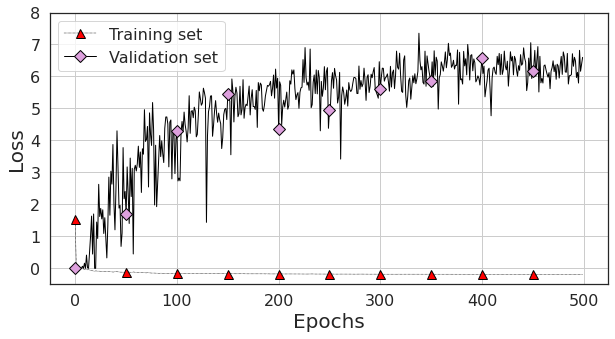

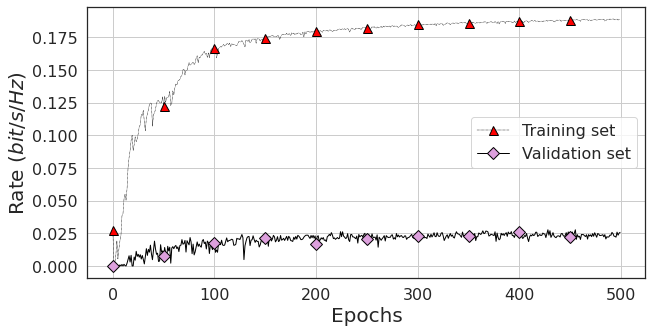

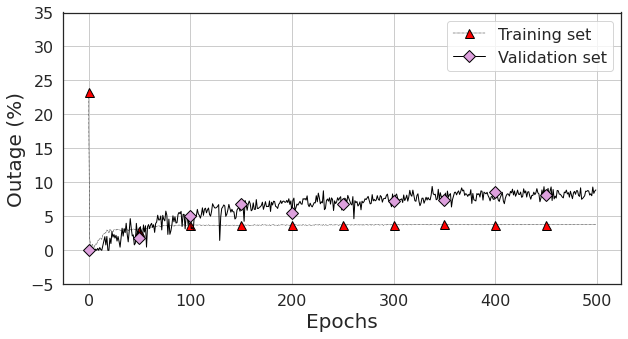

In [9]:
sns.set(style='white')
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure(1)

plt.xlabel("Epochs", fontsize= 20)

plt.ylabel('Loss', fontsize= 20)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 

plt.plot(history.history['loss'], label='Training set',ls='-.', lw=0.4,marker='^',markerfacecolor='red',dash_capstyle='round',color = 'black', markersize=9, markevery=50)
plt.plot(history.history['val_loss'], label = 'Validation set',ls='solid', lw=1
  ,markerfacecolor='plum',dash_capstyle='round',color = 'black',marker='D', markersize=9, markevery=50)
plt.grid()

plt.ylim([-0.5,8])
lgd = plt.legend(loc='best', fontsize= 16)
plt.show()

fig.savefig('Data/dataset/Model Generalization/loss.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

fig = plt.figure(1)

plt.xlabel("Epochs", fontsize= 20)

plt.ylabel(r'Rate $(bit/s/Hz)$', fontsize= 20)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.plot(history.history['throughput'], label='Training set',ls='-.', lw=0.4,marker='^',markerfacecolor='red',dash_capstyle='round',color = 'black', markersize=9, markevery=50)
plt.plot(history.history['val_throughput'], label = 'Validation set',ls='solid', lw=1
  ,markerfacecolor='plum',dash_capstyle='round',color = 'black',marker='D', markersize=9, markevery=50)
plt.grid()

#plt.ylim([-0.02,0])
lgd = plt.legend(loc='best', fontsize= 16)
plt.show()
fig.savefig('Data/dataset/Model Generalization/rate.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

fig = plt.figure(1)


plt.xlabel("Epochs", fontsize= 20)

plt.ylabel('Outage (%)', fontsize= 20)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
def percentage(x):
  x = np.array(x)*100
  x = x.tolist()
  return x

x= percentage(history.history['Primary_ARDP'])
y=percentage(history.history['val_Primary_ARDP'])
plt.plot(x, label='Training set',ls='-.', lw=0.4,marker='^',markerfacecolor='red',dash_capstyle='round',color = 'black', markersize=9, markevery=50)
plt.plot(y, label = 'Validation set',ls='solid', lw=1
  ,markerfacecolor='plum',dash_capstyle='round',color = 'black',marker='D', markersize=9, markevery=50)
plt.grid()
lgd = plt.legend(loc='best', fontsize= 16)

plt.ylim([-5,35])
plt.show()
fig.savefig('Data/dataset/Model Generalization/outage.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

np.save('Data/dataset/Model Generalization/train_and_test_sigma_10',history.history)

model.save('Data/dataset/Model Generalization/train_and_test_sigma_10.h5')



### Pretrained Model

####Load model (weights and training history)

In [ ]:
# modified part YB


#LD = {'10_-1':10**-1,'10_-0.75':10**-0.75,'10_-0.5':10**-0.5,'10_-0.25':10**-0.25,'10_0':10**0,'10_0.25':10**0.25,'10_0.5':10**0.5,'10_0.75':10**0.75,'10_1':10**1,'10_1.25':10**1.25,'10_1.5':10**1.5,'10_1.75':10**1.75,'10_2':10**2}

LD = {'10_0.5':10**0.5}


LR = {'10_-4':10**-4}


predicted_debit = []
predicted_debit_all = []
debit_gap, debit_gap_all = np.array([]), []

pdd_vmin, pdd_vmax, pdd_vmean, pdd_vstd = np.array([]), np.array([]), np.array([]), np.array([])
pdd_vmin_all, pdd_vmax_all, pdd_vmean_all, pdd_vstd_all = [], [], [], []

viloated_tau, viloated_tau_all = np.array([]), []

for ld_k in LD.keys():

  for lr_k in LR.keys():
    
      model = tf.keras.models.load_model('model_train_VF_S7_D10/Lambda = '+ld_k+'/weights/'+lr_k+'.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

      ##### Evaluation on test set #####
      predictions = model.predict(x_test)
    
      # debit calculation for ground truth and predicted test set
      debit_hat_test = debit(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], x_test[:,7], predictions[:,0], predictions[:,1], predictions[:,2])
      debit_true_test = dataset(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], x_test[:,7], y_test[:,0], np.sqrt(y_test[:,1]), np.sqrt(y_test[:,2]), np.sqrt(y_test[:,3]))

      
      #predicted debit
  
      predicted_debit.append(debit_hat_test[:,8]) 
     
      ###### Gap Acheivable rate ######
      #Avreage debit gap between predicted and Brutefroce debit
      debit_gap = np.append(debit_gap, avreage_gap(debit_hat_test[:,8], debit_true_test[:,8])) #[:,7] : extracting debit from ND array

      ###### Primary degradation Violation ######
      #  Primary degradation percentage, mean and median calculation
      # qos_violation calculation
      tau_violation_count = Tau_Violation_Number(x_test[:,0], x_test[:,1], x_test[:,6], predictions[:,0], predictions[:,1], predictions[:,2]) 

      viloated_tau = np.append(viloated_tau, Tau_Violation_percentage(x_test, tau_violation_count))

      # min, max, mean and std for primary debit degradation
      pdd_vmin, pdd_vmax, pdd_vmean, pdd_vstd =  np.append(pdd_vmin,pdd_min(x_test[:,0], x_test[:,1], x_test[:,6], predictions[:,0], predictions[:,1], predictions[:,2])), np.append(pdd_vmax,pdd_max(x_test[:,0], x_test[:,1], x_test[:,6], predictions[:,0], predictions[:,1], predictions[:,2])), np.append(pdd_vmean, pdd_mean(x_test[:,0], x_test[:,1], x_test[:,6], predictions[:,0], predictions[:,1], predictions[:,2])), np.append(pdd_vstd,pdd_std(x_test[:,0], x_test[:,1], x_test[:,6], predictions[:,0], predictions[:,1], predictions[:,2]))  
  # append data from the temporary list to the principal list
  debit_gap_all.append(debit_gap)

  predicted_debit_all.append(predicted_debit)

  viloated_tau_all.append(viloated_tau)
  pdd_vmin_all.append(pdd_vmin)
  pdd_vmax_all.append(pdd_vmax)
  pdd_vmean_all.append(pdd_vmean)
  pdd_vstd_all.append(pdd_vstd)

  # empty temporary lists
  predicted_debit = []
  debit_gap, viloated_tau = np.array([]), np.array([])

  pdd_vmin, pdd_vmax, pdd_vmean, pdd_vstd = np.array([]), np.array([]), np.array([]), np.array([])


In [ ]:
np.array(ard_mean_all).shape

In [ ]:
np.array(qos_median_all).shape

In [ ]:
np.array(predicted_debit_all).shape

####Evaluation

In [ ]:
LD = ['$10^{-1}$', '$10^{-0.75}$','$10^{-0.5}$', '$10^{-0.25}$','$10^{0}$', '$10^{0.25}$','$10^{0.5}$', '$10^{0.75}$','$10^{1}$','$10^{1.25}$','$10^{1.5}$','$10^{1.75}$','$10^{2}$']
LR = {'$10^{-4}$'}

In [ ]:
from matplotlib.colors import ListedColormap

def results_grid(title, data, lambda_label, lr_label):
  #df = pd.DataFrame(data, list(lambda_label.keys()), list(lr_label.keys()))
  df = pd.DataFrame(data, lambda_label, lr_label)

  fig, ax = plt.subplots(figsize=(10,10))
  plt.title(title)
  ax = sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
  plt.ylabel('Lambda')
  plt.xlabel('Learning rate')
  ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 10)
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF/Results_VF/Grid color/'+title, bbox_inches='tight')


################ Acheivable rate results ################

results_grid('Acheivable rate avreage gap',debit_gap_all, LD, LR)
#results_grid('Acheivable rate RMSE', debit_rmse_all, LD, LR)
#results_grid('Acheivable rate NRMSE', debit_nrmse_all, LD, LR)
#results_grid('Acheivable rate R-squared', debit_r2_all, LD, LR)

################ QoS results ################
results_grid('Percentage of Primary throughput degradation',viloated_tau_all, LD, LR)
#results_grid(r'Mean of PTD greater then $\tau$', ard_mean_all, LD, LR)
#results_grid(r'Median of PTD greater then $\tau$', ard_median_all, LD, LR)

################ Primary achievable rate degradation results ################

results_grid('Mean of primary achievable rate degradation',pdd_vmean_all, LD, LR)
results_grid('Min of primary achievable rate degradation',pdd_vmin_all, LD, LR)
results_grid('Max of primary achievable rate degradation',pdd_vmax_all, LD, LR)
results_grid('Std of primary achievable rate degradation',pdd_vstd_all, LD, LR)




In [ ]:
df = pd.DataFrame(debit_gap_all, LD.keys(), LR.keys())

In [ ]:
LD = {'10_-1':10**-1,'10_-0.75':10**-0.75,'10_-0.5':10**-0.5,'10_-0.25':10**-0.25,'10_0':10**0,'10_0.25':10**0.25,'10_0.5':10**0.5,'10_0.75':10**0.75,'10_1':10**1,'10_1.25':10**1.25,'10_1.5':10**1.5,'10_1.75':10**1.75,'10_2':10**2}

LR = {'10_-4':10**-4}


In [ ]:
debit_true = dataset(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], x_test[:,7], y_test[:,0], np.sqrt(y_test[:,1]), np.sqrt(y_test[:,2]), np.sqrt(y_test[:,3]))

In [ ]:
def CDB(x, y, debit_GT):
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)
  

  colors = ['plum', 'green', 'aqua', 'wheat', 'darkred', 'grey', 'peru', 'purple', 'black', 'red']
  m = ['P','o', 'v', '^', '<', '>', 'H', '8', 'p','s']
  marker_N = 12000
  for j in range(x.shape[0]):
    for k in range(x.shape[1]):
           #sns.ecdfplot(data=x[j,k,:], label=r'Lr = '+'$'+y[k].replace('_','^{')+'}$', lw=1, ls=':', marker=m[k],markerfacecolor=colors[k], dash_capstyle='round',color = 'black', markersize=8, markevery=marker_N)

           sns.ecdfplot(data=x[j,k,:], label='Proposed method', lw=1, ls='dashed', marker='P',markerfacecolor='plum', dash_capstyle='round',color = 'black', markersize=8, markevery=marker_N)
    fig = plt.figure(1)
    sns.ecdfplot(data=debit_GT[:,8], label='Bruteforce', lw=1, ls='dashed', marker='p',markerfacecolor='red', dash_capstyle='round',color = 'black', markersize=8, markevery=marker_N)
  
    plt.grid()
    plt.xlabel("Achievable rate")
    
    plt.title(r'Cumulative distribution function '+"($ \lambda$ = "+'$'+list(LD.keys())[j].replace('_','^{')+'}$'+')',fontweight="bold")
    
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=3)
    fig.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF/Results_VF/CDB/CDB_'+list(LD.keys())[j]+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.show()
    plt.pause(1)

In [ ]:
LD = {'10_-1':10**-1,'10_-0.75':10**-0.75,'10_-0.5':10**-0.5,'10_-0.25':10**-0.25,'10_0':10**0,'10_0.25':10**0.25,'10_0.5':10**0.5,'10_0.75':10**0.75,'10_1':10**1,'10_1.25':10**1.25,'10_1.5':10**1.5,'10_1.75':10**1.75,'10_2':10**2}

LR = {'10_-4':10**-4}


def CDB(x, y, debit_GT):
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)
  
  colors = ['plum', 'green', 'aqua', 'wheat', 'darkred', 'grey', 'peru', 'purple', 'black', 'red']
  m = ['P','o', 'v', '^', '<', '>', 'H', '8', 'p','s']
  marker_N = 20000

  fig = plt.figure(1)
  #sns.ecdfplot(data=x[0,0,:], label=r'Proposed method ($\lambda = 10^{-1}$)', lw=1, ls='dashed', marker='^',markerfacecolor='darkred', dash_capstyle='round',color = 'black', markersize=9, markevery=marker_N)

  sns.ecdfplot(data=x[6,0,:], label=r'Proposed method ($\lambda = 10^{0.5}$)', lw=1, ls='solid', marker='^',markerfacecolor='plum', dash_capstyle='round',color = 'black', markersize=9, markevery=marker_N)
  sns.ecdfplot(data=x[12,0,:], label=r'Proposed method ($\lambda = 10^{2}$)', lw=1, ls='solid', marker='o',markerfacecolor='wheat', dash_capstyle='round',color = 'black', markersize=9, markevery=marker_N)

  sns.ecdfplot(data=debit_GT[:,8], label='Bruteforce', lw=1, ls='solid', marker='p',markerfacecolor='red', dash_capstyle='round',color = 'black', markersize=9, markevery=marker_N)

  plt.grid()
  plt.xlabel("Achievable rate")
  
  #plt.title('Cumulative distribution function',fontweight="bold")
  lgd = plt.legend(loc='best', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
  #lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
  #        fancybox=True, shadow=True, ncol=3)
  fig.savefig('CDB_2.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
  fig.show()
  plt.pause(1)

In [ ]:
CDB(np.array(predicted_debit_all), list(LR.keys()),debit_true)

In [ ]:
def plot_learning_curve(title, data, val_data, ylab, x_lim, y_lim, Ld, Lr, filename):
  """
      Parameters:
         title : title of the figure (figure will be saved same as title)
         data: 1D array contains learning data history.
         ylab: y label.
         x_lim: set the x limits of the current axes.
         y_lim : set the y-limits of the current axes.
         filename : name of the file or path created to store figures.
      Returns:
         Plot for Achievable rate, Loss, Primary rate degradation and Qos violation evolution.
  """
  tf.io.gfile.makedirs('/content/drive/MyDrive/Colab Notebooks/CodeVF/'+filename)

  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  colors = ['green', 'aqua', 'wheat', 'darkred', 'grey', 'peru', 'purple', 'black', 'plum']
  marker = ['-.',':','--','-']
  m = ['o', 'v', '^', '<', '>', 'H', '8', 'p','s','1','2','3','4','_','D','|','x','h','v']
  #markerfacecolor= ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted']
  for k, v in enumerate(Ld):
    for k2, v2 in enumerate(Lr):
          plt.title(title, fontweight="bold")
          plt.plot(data[k][k2][:], label='Training set',ls='dashed', lw=1,markerfacecolor='red', marker='p',dash_capstyle='round',color = 'black', markersize=8, markevery=50)
          plt.plot(val_data[k][k2][:], label='Validation set',ls='dashed', lw=1,markerfacecolor='plum', marker='P',dash_capstyle='round',color = 'black', markersize=8, markevery=50)

          plt.ylim([-0.50,0.10]) 
    fig = plt.figure(1)
    plt.xlabel("Epochs")
    plt.grid()
    plt.ylabel(ylab)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    lgd2 = plt.legend(title='hi')
    lgd = plt.legend(loc='upper center', title=r'$\lambda$ = '+'$'+v.replace('_','^{')+'}$',bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=3)#title="Learning rate"
    
    fig.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF'+filename+title+v+'.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.ion()
    plt.pause(1)
    plt.close()  



In [ ]:
LD = {'10_0.5':10**0.5,'10_2':10**2}

LR = {'10_-4':10**-4}


Loss_temp, Loss_data = [], []

Throughput_temp, Throughput_data = [], []

V_Qos_temp, V_Qos_data = [], []

Rp_degradation_temp, Rp_degradation_data = [], []


for ld_k in LD.keys():
  for lr_k in LR.keys():
  
    history = np.load('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train_WN_VF/Lambda = '+ld_k+'/history/'+lr_k+'.npy',allow_pickle='TRUE').item()
    
    Loss_temp.append(history['loss'])
    Throughput_temp.append(history['throughput'])# Achievable_Rate
    V_Qos_temp.append(history['Primary_ARDP']*100)# Primary_ARDP
    Rp_degradation_temp.append(history['Primary_Achievable_Rate_Degradation']*100) #
  
  Loss_data.append(Loss_temp)
  Throughput_data.append(Throughput_temp)
  V_Qos_data.append(V_Qos_temp)
  Rp_degradation_data.append(Rp_degradation_temp)

  Loss_temp, Throughput_temp, V_Qos_temp, Rp_degradation_temp  = [], [], [], []
   

In [ ]:
LD = {'10_0.5':10**0.5,'10_2':10**2}

LR = {'10_-4':10**-4}


val_Loss_temp, val_Loss_data = [], []

val_Throughput_temp, val_Throughput_data = [], []

val_V_Qos_temp, val_V_Qos_data = [], []

val_Rp_degradation_temp, val_Rp_degradation_data = [], []


for ld_k in LD.keys():
  for lr_k in LR.keys():
  
    history = np.load('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train_WN_VF/Lambda = '+ld_k+'/history/'+lr_k+'.npy',allow_pickle='TRUE').item()
    
    val_Loss_temp.append(history['val_loss'])
    val_Throughput_temp.append(history['val_throughput'])# Achievable_Rate
    val_V_Qos_temp.append(history['val_Primary_ARDP'])# Primary_ARDP
    val_Rp_degradation_temp.append(history['val_Primary_Achievable_Rate_Degradation']) #
  
  val_Loss_data.append(val_Loss_temp)
  val_Throughput_data.append(val_Throughput_temp)
  val_V_Qos_data.append(val_V_Qos_temp)
  val_Rp_degradation_data.append(val_Rp_degradation_temp)

  val_Loss_temp, val_Throughput_temp, val_V_Qos_temp, val_Rp_degradation_temp  = [], [], [], []
   

In [ ]:
def plot_learning_curve(title, data, val_data, ylab, x_lim, y_lim, Ld, Lr, filename):
  """
      Parameters:
         title : title of the figure (figure will be saved same as title)
         data: 1D array contains learning data history.
         ylab: y label.
         x_lim: set the x limits of the current axes.
         y_lim : set the y-limits of the current axes.
         filename : name of the file or path created to store figures.
      Returns:
         Plot for Achievable rate, Loss, Primary rate degradation and Qos violation evolution.
  """

  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  colors = ['green', 'aqua', 'wheat', 'darkred', 'grey', 'peru', 'purple', 'black', 'plum']
  marker = ['-.',':','--','-']
  m = ['o', 'v', '^', '<', '>', 'H', '8', 'p','s','1','2','3','4','_','D','|','x','h','v']
  #markerfacecolor= ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted']

  #plt.title(title, fontweight="bold")
  # plum, wheat, red
  
  plt.plot(data[0][0][:], label=r'Training set ($\lambda = 10^{0.5}$)',ls='solid', lw=1, marker='^',markerfacecolor='plum',dash_capstyle='round',color = 'black', markersize=9, markevery=50)
  plt.plot(val_data[0][0][:], label='Validation set ($\lambda = 10^{0.5}$)',ls='dotted', lw=1,marker='^',markerfacecolor='plum',dash_capstyle='round',color = 'black', markersize=9, markevery=50)

  plt.plot(data[1][0][:], label=r'Training set ($\lambda = 10^{2}$)',ls='solid', lw=1,marker='o',markerfacecolor='wheat',dash_capstyle='round',color = 'black', markersize=9, markevery=50)
  plt.plot(val_data[1][0][:], label=r'Validation set ($\lambda = 10^{2}$)',ls='dotted', lw=1,marker='o',markerfacecolor='wheat',dash_capstyle='round',color = 'black', markersize=9, markevery=50)

  plt.ylim([-0.50,0.10]) 
  fig = plt.figure(1)
  plt.xlabel("Epochs")
  plt.grid()
  plt.ylabel(ylab)
  plt.xlim(x_lim)
  plt.ylim(y_lim)
  lgd2 = plt.legend(title='hi')
  lgd = plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=2)#title="Learning rate"
  
  fig.savefig(title+'_vf''.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
  plt.show()
  plt.ion()
  plt.pause(1)
  plt.close()  



In [ ]:
plot_learning_curve('Model loss', Loss_data, val_Loss_data, 'Loss', [0.1,200], [-0.175,0], LD, LR, '/Results_VF/Curve/')

In [ ]:
plot_learning_curve('Primary network violation', V_Qos_data, val_V_Qos_data, 'Outage (%)', [0.1,200], [-0.01,0.25], LD, LR, '/Results_VF/Curve/')

In [ ]:
plot_learning_curve('Secondary achievable rate', Throughput_data,val_Throughput_data, r'Throughput $(Bits/S)$', [0,200], [0,0.17], LD, LR,'/Results_VF/Curve/')

In [ ]:
plot_learning_curve('Instantaneous primary acheivable rate degradation', Rp_degradation_data, val_Rp_degradation_data, 'D (%)', [0.1,200], [0,0.25], LD, LR, '/Results_VF/Curve/')

In [ ]:
#Rp_degradation_data[:] = [x * 100 for x in Rp_degradation_data] 
Rp_degradation_data

In [ ]:
'''
  plots('Qos violation evolution (Validation set with '+lambda_label[i]+')', 'QoS violation (%)', d_val_vqos_history, [0.1,500])

  plots('Achievable rate evolution (Validation set with '+lambda_label[i]+')', r'Throughput $(Bits/S)$', d_val_throughput_history, [0.1,500])
  
  plots_losses('Model loss (Validation set with normalization for '+lambda_label[i]+')', 'Loss',d_val_loss_history, [0.1,500], [-0.20,0.20])
   
 # plots('Primary achievable rate degradation (Validation set with normalization for '+lambda_label[i]+')', 'Primary achievable rate degradation (%)', d_val_rp_degradation_history, [0.1,500])
'''

In [ ]:
qos_count_train = qos_constraint(predictions1[:,0], predictions1[:,1], predictions1[:,2], x_train[:,0], x_train[:,1], x_train[:,4], x_train[:,6])
qos_count_test = qos_constraint(predictions2[:,0], predictions2[:,1], predictions2[:,2], x_test[:,0], x_test[:,1], x_test[:,4], x_test[:,6])

In [ ]:
qos_mean_train, qos_median_train = QoS_stats(predictions1[:,0], predictions1[:,1], predictions1[:,2], x_train[:,0], x_train[:,1], x_train[:,4], x_train[:,6])
qos_mean_test, qos_median_test = QoS_stats(predictions2[:,0], predictions2[:,1], predictions2[:,2], x_test[:,0], x_test[:,1], x_test[:,4], x_test[:,6])
print('\033[1m' +'train set results : \n')
print('\033[0m'+'mean of qos violation: ', qos_mean_train*100)
print('median of qos violation: ', qos_median_train*100)
print('\n')
print('\033[1m' +'test set results : \n')
print('\033[0m'+'mean of qos violation: ', qos_mean_test*100)
print('median of qos violation: ', qos_median_test*100)

In [ ]:
def V_QoS_Hist(title, Lambda_value, Lr_value, Alpha, Pr, Ps, Grp, Gpp, Gss, Gsp):
  """
    Parameters:
      title: Title of the figure.
      Lambda_value: Lambda values.
      Lr_value: Learning rate values.
      Alpha: 1D Array containing Alpha values.
      Pr: 1D Array containing Power of relay.
      Ps: 1D Array containing Power of secondary network.
      Grp: 1D Array containing Channel Gain between relay and primary receiver.
      Gpp: 1D Array containing Channel Gain between primary transmitter and primary receiver.
      Gss: 1D Array containing Channel Gain between secondarytransmitter and secondary receiver.
      Gsp: 1D Array containing Channel Gain between secondary transmitter and primary receiver.
    Returns:
      Histogram for QoS violation
  """
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  res = QoS_Normalized(Alpha, Pr, Ps, Grp, Gpp, Gss, Gsp)
  fig, ax = plt.subplots(1) # Creates figure fig and add an axes, ax.
  plt.title('QoS violation for lambda = '+Lambda_value+' and Lr = '+Lr_value,fontweight="bold")
  ax.hist(res, 100, density = True)
  #plt.xlim((-1,3))
  plt.grid()
  plt.yscale('log')
  plt.legend([title], loc='best')
  plt.xlabel('QoS violation percentage', fontsize=12)
  plt.ylabel('Samples', fontsize=12)

  #fig.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF/Results/QoS/histogram_'+title+'lambda_'+Lambda_value+'lr_'+Lr_value+'.png')
  fig.show() #Only shows figure 1 and removes it from the "current" stack.

def Pdd_Hist(Grp, Gpp, Gsp, Alpha, Pr, Ps, Lambda_value, Lr_value):
  """
    Parameters:
      Grp: Channel Gain between relay and primary receiver.
      Gpp: Channel Gain between primary transmitter and primary receiver. 
      Gsp: Channel Gain between secondary transmitter and primary receiver.
      Alpha: Array containing Alpha values.
      Pr: Array containing Power of relay.
      Ps: Array containing Power of secondary network.
    Returns:
      histogram for Primary debit degradation 
  """
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  res = pdd(Grp, Gpp, Gsp ,Alpha, Pr, Ps)
  fig, ax = plt.subplots(1) # Creates figure fig and add an axes, ax.
  plt.title('Primary achievable rate degradation distribution Lambda= '+Lambda_value+' and Lr = '+Lr_value,fontweight="bold")

  ax.hist(res, 100)
  #plt.xlim((-1,3))
  plt.grid()
  plt.yscale('log')
  plt.xlabel('Primary debit degradation percentage', fontsize=12)
  plt.ylabel('Samples', fontsize=12)
  fig.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF/Results_WN/Histogram/histogram_PTD_lambda_'+Lambda_value+'_lr_'+Lr_value+'.png')
  fig.show() 



In [ ]:
def Pdd_Hist(Grp, Gpp, Gsp, Alpha, Pr, Ps, Lambda_value, Lr_value):
  """
    Parameters:
      Grp: Channel Gain between relay and primary receiver.
      Gpp: Channel Gain between primary transmitter and primary receiver. 
      Gsp: Channel Gain between secondary transmitter and primary receiver.
      Alpha: Array containing Alpha values.
      Pr: Array containing Power of relay.
      Ps: Array containing Power of secondary network.
    Returns:
      histogram for Primary debit degradation 
  """
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  res = pdd(Grp, Gpp, Gsp ,Alpha, Pr, Ps)
  fig, ax = plt.subplots(1) # Creates figure fig and add an axes, ax.
  plt.title('Primary achievable rate degradation distribution',fontweight="bold")

  ax.hist(res, 100, histtype='step',  lw = 2)
  plt.xlim((-0.01,0.35))
  plt.grid()
  plt.yscale('log')
  plt.xlabel('Primary debit degradation percentage', fontsize=12)
  plt.ylabel('Samples', fontsize=12)
  #plt.legend(r'$\lambda = $'+Lambda_value, loc='best')
  plt.annotate(r"$\lambda$ = "+'$'+Lambda_value.replace('_','^{')+'}$', xy=(0.05,0.9),xycoords='axes fraction',
             fontsize=14)


  fig.savefig('/content/drive/MyDrive/Colab Notebooks/CodeVF/Results_VF/Histogram/histogram_PTD_lambda_'+Lambda_value+'_lr_'+Lr_value+'.png')
  fig.show() 


In [ ]:
def Pdd_Hist(Grp, Gpp, Gsp, Alpha, Pr, Ps, Alpha2, Pr2, Ps2):
  """
    Parameters:
      Grp: Channel Gain between relay and primary receiver.
      Gpp: Channel Gain between primary transmitter and primary receiver. 
      Gsp: Channel Gain between secondary transmitter and primary receiver.
      Alpha: Array containing Alpha values.
      Pr: Array containing Power of relay.
      Ps: Array containing Power of secondary network.
    Returns:
      histogram for Primary debit degradation 
  """
  sns.set(style='white')
  plt.rcParams["figure.figsize"] = (10,5)

  res = pdd(Grp, Gpp, Gsp ,Alpha, Pr, Ps)
  res2 = pdd(Grp, Gpp, Gsp ,Alpha2, Pr2, Ps2)

  fig, ax = plt.subplots(1) # Creates figure fig and add an axes, ax.
  plt.title('Primary achievable rate degradation distribution',fontweight="bold")

  ax.hist(res, 100, histtype='step', ls=':', lw = 2 , color='red',label='$\lambda = 10^{0.5}$')
  ax.hist(res2, 100, histtype='step', ls='-',  lw = 2, label='$\lambda = 10^{2}$')

  plt.xlim((-0.01,0.35))
  plt.grid()
  plt.yscale('log')
  plt.xlabel('Primary debit degradation percentage', fontsize=12)
  plt.ylabel('Samples', fontsize=12)
  plt.legend(loc='best')
  #plt.annotate(r"$\lambda$ = "+'$'+Lambda_value.replace('_','^{')+'}$', xy=(0.05,0.9),xycoords='axes fraction',
  #           fontsize=14)


  fig.savefig('Histogram.png')
  fig.show() 




model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train_WN_VF/Lambda = 10_0.5/weights/10_-4.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train_WN_VF/Lambda = 10_2/weights/10_-4.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

##### Evaluation on train set #####
predictions1 = model.predict(x_test)
predictions2 = model2.predict(x_test)

Pdd_Hist(x_test[:,0], x_test[:,1], x_test[:,6], predictions1[:,0], predictions1[:,1], predictions1[:,2], predictions2[:,0], predictions2[:,1], predictions2[:,2])
      

In [ ]:
for ld_k in LD.keys():

  for lr_k in LR.keys():

      model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train_WN_VF/Lambda = '+ld_k+'/weights/'+lr_k+'.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

      ##### Evaluation on train set #####
      predictions1 = model.predict(x_test)
      
      Pdd_Hist(x_test[:,0], x_test[:,1], x_test[:,6], predictions1[:,0], predictions1[:,1], predictions1[:,2], ld_k, lr_k)
      

In [ ]:
for ld_k in LD.keys():

  for lr_k in LR.keys():

      model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train/Lambda = '+ld_k+'/weights/'+lr_k+'.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

      ##### Evaluation on test set #####
      #predictions1 = model.predict(x_train)
      predictions2 = model.predict(x_test)
      
      #V_QoS_Hist('train', predictions1[:,0], predictions1[:,1], predictions1[:,2], x_train[:,0], x_train[:,1], x_train[:,4], x_train[:,6])
      V_QoS_Hist('test', ld_k, lr_k,predictions2[:,0], predictions2[:,1], predictions2[:,2], x_test[:,0], x_test[:,1], x_test[:,4], x_test[:,6])

In [ ]:
for ld_k in LD.keys():

  for lr_k in LR.keys():

      model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CodeVF/model_train/Lambda = '+ld_k+'/weights/'+lr_k+'.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

      ##### Evaluation on train set #####
      predictions1 = model.predict(x_train)
      
      V_QoS_Hist('train', ld_k, lr_k, predictions1[:,0], predictions1[:,1], predictions1[:,2], x_train[:,0], x_train[:,1], x_train[:,4], x_train[:,6])


In [ ]:
debit_hat_train = debit(x_train[:,0], x_train[:,1], x_train[:,2], x_train[:,3],x_train[:,4], x_train[:,5], x_train[:,6], predictions1[:,0], predictions1[:,1], predictions1[:,2])
debit_true_train = dataset(x_train[:,0], x_train[:,1], x_train[:,2], x_train[:,3],x_train[:,4], x_train[:,5], x_train[:,6], y_train[:,0], np.sqrt(y_train[:,1]), np.sqrt(y_train[:,2]), np.sqrt(y_train[:,3]))

debit_hat_test = debit(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], predictions2[:,0], predictions2[:,1], predictions2[:,2])
debit_true_test = dataset(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], y_test[:,0], np.sqrt(y_test[:,1]), np.sqrt(y_test[:,2]), np.sqrt(y_test[:,3]))


In [ ]:
#debit_hat_train = debit_A(x_train[:,0], x_train[:,1], x_train[:,2], x_train[:,3],x_train[:,4], x_train[:,5], x_train[:,6], predictions1[:,0], predictions1[:,1], predictions1[:,2])
#debit_true_train = debit_A(x_train[:,0], x_train[:,1], x_train[:,2], x_train[:,3],x_train[:,4], x_train[:,5], x_train[:,6], y_train[:,1], y_train[:,2], y_train[:,3])

#debit_hat_test = debit_A(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], predictions2[:,0], predictions2[:,1], predictions2[:,2])
#debit_true_test = debit_A(x_test[:,0], x_test[:,1], x_test[:,2], x_test[:,3],x_test[:,4], x_test[:,5], x_test[:,6], y_test[:,1], y_test[:,2], y_test[:,3])


In [ ]:
results_test = evaluation(debit_hat_test, debit_true_test)
results_train = evaluation(debit_hat_train, debit_true_train)
display_evaluation('DF', results_train, 'train set')
display_evaluation('DF', results_test, 'test set')

In [ ]:
V_QoS_display(x_test, x_train, qos_count_test, qos_count_train)